# Kaggle Challenge
## #1 Titanic. Deep Learning from Disaster (with Keras)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

EDA 를 통해 데이터의 전반적인 연관성과 데이터의 특성을 파악했으므로, 이제 데이터가 Keras 모델에 들어가 정확도를 높일 수 있도록 데이터를 가공해야한다. 그리고 이 작업은 Train Data 와 Test Data 모두에 대해서 진행해야 한다.

## 데이터 가공하기 (Preprocessing)

### (1) Train Data 불러오기

In [2]:
raw_train = pd.read_csv('/home/lifeofpy/Desktop/Titanic/train.csv', engine='python')
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### (2) Test Data 불러오기

In [3]:
raw_test = pd.read_csv('/home/lifeofpy/Desktop/Titanic/test.csv', engine='python')
raw_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### (3) 데이터 전체 상황 파악하기

In [4]:
raw_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
raw_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

train 과 test 데이터 모두 Age(나이)와 Cabin(좌석번호), Embarked(선착장) 데이터에 대해 결측치가 있으므로, 이에 대한 처리가 필요하다. 나이 데이터는 매우 중요하고 평균값으로 대체할 수 있는데에 비해, 좌석 데이터는 Pclass(승객등급) 데이터가 있고, 임의로 대체 불가하다고 생각해서 제외시키기로 했다. 그리고 선착장 변수는 결측치가 2개이므로, 가장 많이 나온 선착장으로 대체해준다.

그리고 결측치는 없으나 해당 데이터에서 중요하지 않다고 판단한 Ticket(티켓번호) 데이터와 Fare(요금) 데이터에 대한 열을 삭제해준다.

In [6]:
del raw_train['Ticket']
del raw_test['Ticket']
del raw_train['Fare']
del raw_test['Fare']

### (4) 중요하지 않은 Cabin 데이터 열 삭제하기

In [7]:
del raw_train['Cabin']

In [8]:
raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [9]:
del raw_test['Cabin']

In [10]:
raw_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,S


### (5) Age 데이터 나이 평균으로 결측치 채워넣기

In [11]:
raw_train['Age'].fillna(value=round(raw_train['Age'].mean(), 1), inplace=True)

In [12]:
raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [13]:
raw_test['Age'].fillna(value=round(raw_test['Age'].mean(), 1), inplace=True)

In [14]:
raw_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.3,0,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,S
416,1308,3,"Ware, Mr. Frederick",male,30.3,0,0,S


### (6) Embarked 변수의 결측치를 가장 많이 나온 선착장으로 대체하기

In [15]:
raw_train['Embarked'].fillna(value='S', inplace=True)

In [16]:
raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


## 특징변수 새로 만들기 (Making Features)

### (1) 호칭을 나타내는 Title 데이터

Name 데이터는 해당 승객이 귀족인지 아닌지를 판별해주며, 나이대를 대충 가늠하게 할 수 있는 중요한 데이터이다.

In [17]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


이렇게 이름에 Mr, Mrs, Miss 등 어떤 호칭이 붙는지에 따라서 생존에 영향을 끼쳤을 수 있으므로, Title 이라는 변수를 따로 만들어 호칭만 따로 볼 수 있도록 할 것이다.

따라서 Name 변수에서 호칭만 따로 떼오는 정규식을 활용해 호칭만 'Title' 변수의 값으로 만들었다.

In [18]:
raw_train['Title'] = raw_train.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [19]:
raw_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Mme           1
Jonkheer      1
Ms            1
Sir           1
Capt          1
Lady          1
Countess      1
Name: Title, dtype: int64

아래와 같은 타이틀이 있는데, 이 타이틀 모두가 필요한 것은 아니므로, 거의 나타나지 않는(Mr, Miss, Mrs, Master 가 아닌) 호칭을 통합해야 한다.

In [20]:
raw_train['Title'] = raw_train['Title'].replace(['Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [21]:
raw_train['Title'] = raw_train['Title'].replace('Lady', 'Mrs')
raw_train['Title'] = raw_train['Title'].replace('Mme', 'Mrs')
raw_train['Title'] = raw_train['Title'].replace('Mlle', 'Miss')
raw_train['Title'] = raw_train['Title'].replace('Ms', 'Miss')

이렇게 통합을 해주었으므로, Title 변수가 효과가 있는지 확인해보도록 한다.

<AxesSubplot:xlabel='Title', ylabel='Survived'>

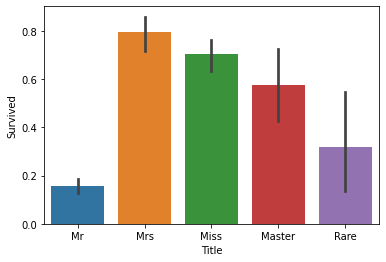

In [22]:
sns.barplot(x='Title', y='Survived', data=raw_train)

남성(Mr)은 거의 살아남지 못했으나, Master 타이틀을 가지고 있는 귀족은 생존율이 60%에 가까웠다.

이러한 값들을 모델에 넣기 위해 숫자 형태로 만들어야 한다. 따라서 unique 함수를 통해 Mr, Mrs, Miss, Master, Rare 에 대한 값을 0,1,2,3,4 에 대한 숫자로 표현한다. unique 함수는 중복되지 않는 고유한 요소들의 배열을 리턴해준다.

In [23]:
_, raw_train['Title'] = np.unique(raw_train['Title'], return_inverse=True)

여기서 파라미터인 return_inverse 는 값이 True 이면 입력 배열을 재구성할 때 쓰이는 고유 배열의 인덱스를 반환한다.

In [24]:
raw_train['Title'].head(10)

0    2
1    3
2    1
3    3
4    2
5    2
6    2
7    0
8    3
9    3
Name: Title, dtype: int64

### (2) 나이가 어린 승객을 구분해주는 young_survivors 데이터

In [25]:
raw_train['young_survivors'] = 0
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,young_survivors
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,2,0


'나이가 어리다'의 기준을 10대 이하로 잡아보자. 그리고 나이가 어린(13살 이하) 생존자라는 파생변수(young_survivors)를 하나 만들어서, 나이가 어린 생존자의 비율과 그렇지 않은 생존자의 비율을 비교해보자.

In [26]:
young_people = 0
for i in range(len(raw_train)):
    if raw_train['Age'][i] <= 13:
        young_people += 1
        if raw_train['Survived'][i] == 1:
            raw_train['young_survivors'][i] += 1
raw_train[30:60]

/home/lifeofpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,young_survivors
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,C,4,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.7,1,0,C,3,0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,29.7,0,0,Q,1,0
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,S,2,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,C,2,0
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,S,2,0
36,37,1,3,"Mamee, Mr. Hanna",male,29.7,0,0,C,2,0
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,S,2,0
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,S,1,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,C,1,0


### (3) 그 외 변수 정리해주기

분석에 필요없는 변수는 모델에 불필요하므로 삭제한다.

In [27]:
raw_train.drop(['SibSp', 'Parch', 'Name', 'PassengerId', 'Age'], inplace=True, axis=1)

분석에 필요한 나머지 변수들을 모델에 넣기 위해 숫자로 바꿔준다.

In [28]:
_, raw_train['Sex'] = np.unique(raw_train['Sex'], return_inverse=True)

In [29]:
_, raw_train['Embarked'] = np.unique(raw_train['Embarked'], return_inverse=True)

이렇게 모델이 넣을 모든 변수를 숫자로 바꾸었다. train data 의 값을 확인해보면 다음과 같다.

In [39]:
raw_train.head(10)

,Pclass,Sex,Embarked,Title,young_survivors
0,3,1,2,2,0
1,1,0,0,3,0
2,3,0,2,1,0
3,1,0,2,3,0
4,3,1,2,2,0
5,3,1,1,2,0
6,1,1,2,2,0
7,3,1,2,0,0
8,3,0,2,3,0
9,2,0,0,3,0


이제 목표변수를 독립변수와 분리해준다. 목표변수인 생존여부를 raw_train_y 로 구분했다.

In [31]:
raw_train_y = np.ravel(raw_train.Survived)
raw_train.drop(['Survived'], inplace=True, axis=1)

## Keras 모델 준비하기

In [32]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train data 에 대해 학습을 시작한다. 최적화 함수는 adam, 오차 함수는 이진분류이기 때문에 binary cross entropy 함수를 사용했다. 그리고 정확도를 지표로 삼는다. 

In [36]:
model.fit(raw_train, raw_train_y, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
891/891 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.7116
Epoch 2/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4479 - accuracy: 0.8081
Epoch 3/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.8092
Epoch 4/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8272
Epoch 5/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4120 - accuracy: 0.8249
Epoch 6/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8249
Epoch 7/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4029 - accuracy: 0.8328
Epoch 8/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8249
Epoch 9/50
891/891 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8272
Epoch 10/50
891/891 [==============================] - 1s 1ms/step - loss: 0.4006 - accuracy: 0.8373

이렇게 train data 에 대해 학습을 마쳤다. 정확도는 83.73%가 나왔다. 이제 test data 에 대해 잘 학습이 되었는지 평가를 시작해야 한다. 따라서 test dataset 을 train data 를 준비했던 것과 같은 방법으로 준비해준다. 

### 1) Title 데이터 정제하기

In [89]:
to_test = raw_test.copy(True)
to_test['Title'] = to_test.Name.str.extract('([A-Za-z]+)\.', expand=False)
to_test['Title'] = to_test['Title'].replace(['Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [90]:
to_test['Title'] = to_test['Title'].replace('Mlle', 'Miss')
to_test['Title'] = to_test['Title'].replace('Ms', 'Miss')
to_test['Title'] = to_test['Title'].replace('Mme', 'Mrs')
to_test['Title'] = to_test['Title'].replace('Lady', 'Mrs')

In [91]:
to_test['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Rare
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [92]:
_, to_test['Title'] = np.unique(to_test['Title'], return_inverse=True)

### 2) young_survivors 데이터 추가하기

In [93]:
to_test['young'] = 0
to_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,young
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q,2,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S,3,0


In [94]:
for i in range(len(to_test)):
    if to_test['Age'][i] <= 13:
        to_test['young'][i] += 1
to_test[50:60]

/home/lifeofpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,young
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,S,2,0
51,943,2,"Pulbaum, Mr. Franz",male,27.0,0,0,C,2,0
52,944,2,"Hocking, Miss. Ellen Nellie""""",female,20.0,2,1,S,1,0
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,S,1,0
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,30.3,0,0,C,2,0
55,947,3,"Rice, Master. Albert",male,10.0,4,1,Q,0,1
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,S,2,0
57,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,S,2,0
58,950,3,"Davison, Mr. Thomas Henry",male,30.3,1,0,S,2,0
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,C,1,0


### 3) 필요없는 데이터 삭제하기

In [95]:
to_test = to_test.drop(['SibSp', 'Parch', 'Name', 'PassengerId', 'Age'], axis=1)

In [96]:
_, to_test['Sex'] = np.unique(to_test['Sex'], return_inverse=True)

In [97]:
_, to_test['Embarked'] = np.unique(to_test['Embarked'], return_inverse=True)

In [98]:
to_test

,Pclass,Sex,Embarked,Title,young
0,3,1,1,2,0
1,3,0,2,3,0
2,2,1,1,2,0
3,3,1,2,2,0
4,3,0,2,3,0
...,...,...,...,...,...
413,3,1,2,2,0
414,1,0,0,4,0
415,3,1,2,2,0
416,3,1,2,2,0


test dataset 또한 정제가 되었으므로, 이제 학습한 모델을 통해 예측을 시작한다. 예측을 더 쉽게 하기 위해 flatten(평탄화)를 진행한다.

In [99]:
predictions = model.predict_classes(to_test).flatten()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [101]:
predictions[:5]

array([0, 1, 0, 0, 1], dtype=int32)

In [103]:
submission = pd.DataFrame({
    "PassengerId": raw_test["PassengerId"],
    "Survived": predictions
})
submission.to_csv('submission.csv', index=False)

☞ 타이타닉 생존자 예측에 대해서 Keras 를 사용한 결과, train data 학습에 대해서 83.9%의 정확도를 보였고, test data 의 정확도는 76%가 나왔다. 이는 train data 의 수가 891개로 굉장히 적어서 딥러닝 모델에서 높은 정확도를 낼 수 없었다는 것을 나타낸다.